$\#\#\#\#\#\#\#$ Llibreries $\#\#\#\#\#\#\#$

In [54]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import warnings

warnings.filterwarnings('ignore') 

$\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#$

## Data:

We load the dataset from sprint 5, the one previously cleaned:

In [55]:
df = pd.read_csv('ufc-strikes-by-round-data_CLEAN.csv')

In [56]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [57]:
df.head()

,roundinfo_id,fight_id,fight_round,fighter_id,kd,sig_str_made,sig_str_attempted,sig_str_percent,total_str_made,total_str_attempted,...,head_made,body_attempted,body_made,leg_attempted,leg_made,distance_attempted,distance_made,clinch_attempted,clinch_made,ground_attempted
0,9532,1,5130,1,14,28,50,14,28,0,...,1,1,1,1,24,11,4,3,0,0
1,9532,1,5131,0,10,19,52,10,19,0,...,1,1,4,3,15,8,4,2,0,0
2,9533,1,5132,0,10,16,62,28,36,0,...,2,2,0,0,13,8,1,1,2,1
3,9533,1,5133,0,44,72,61,64,111,3,...,1,1,2,1,7,2,1,1,64,41
4,9533,2,5132,0,7,11,63,12,16,0,...,2,2,0,0,11,7,0,0,0,0


# Nivell 1

## Exercici 1: Agafa un conjunt de dades de tema esportiu que t'agradi i normalitza els atributs categòrics en dummy. Estandaritza els atributs numèrics amb StandardScaler.


The exercise consists in two parts: first, we need to normalize the categorical attributes in dummy. Then, the numerical attributes by using the StandardScaler.

In our dataset the categorical attributes are:
 - roundinfo_id: number of the fight given by the UFC.
 - fight_id: number of the round in the fight.
 - fight_round: number of the rounds a fighter had fought.
 - fight_id: winner of the round. The winner of the fight is 0, while the loser, 1, might also win a around.

In [58]:
# normalize the categorical attributes in dummies:
cat1 = pd.get_dummies(df.roundinfo_id)
cat2 = pd.get_dummies(df.fight_id)
cat3 = pd.get_dummies(df.fight_round)
cat4 = pd.get_dummies(df.fighter_id)

Next, we show how the function .get_dummies normalizes the categorical attributes of fight_id and fighter_id. We have choosen show this two values since they have less categorical attributes. The roundinfo_id and the fight_round, vary the number from fight to fight, thus, in the case of roundinfo_id they change the value each two rows (since two rows make a round, one for each fighter), we have 6475 distinct values, and fight_round, changes for each round the fighter fights, we have 2229 distinct values.

In [59]:
df.roundinfo_id.nunique()

6475

In [60]:
df.fight_round.nunique()

2229

In [61]:
cat2.head()

,1,2,3,4,5
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


We can see that fights have up to five rounds, although some can even finish in the first round, as it is case of the record 0.

In [62]:
cat4.head()

,0,1
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


Indicates which fighter has won the round. In the case of the record 0, the underdog (1) won instead of the favourite (0).

Now we standarize the numerical rows:

In [63]:
df.columns

Index(['roundinfo_id', 'fight_id', 'fight_round', 'fighter_id', 'kd',
       'sig_str_made', 'sig_str_attempted', 'sig_str_percent',
       'total_str_made', 'total_str_attempted', 'td_made', 'td_attempted',
       'td_percent', 'pass', 'rev', 'head_attempted', 'head_made',
       'body_attempted', 'body_made', 'leg_attempted', 'leg_made',
       'distance_attempted', 'distance_made', 'clinch_attempted',
       'clinch_made', 'ground_attempted'],
      dtype='object')

In [64]:
# First, we select the numerical columns:
dfz = df[['kd','sig_str_made', 'sig_str_attempted', 'sig_str_percent',
       'total_str_made', 'total_str_attempted', 'td_made', 'td_attempted',
       'td_percent', 'pass', 'rev', 'head_attempted', 'head_made',
       'body_attempted', 'body_made', 'leg_attempted', 'leg_made',
       'distance_attempted', 'distance_made', 'clinch_attempted',
       'clinch_made', 'ground_attempted']]

dfz.head()

,kd,sig_str_made,sig_str_attempted,sig_str_percent,total_str_made,total_str_attempted,td_made,td_attempted,td_percent,pass,...,head_made,body_attempted,body_made,leg_attempted,leg_made,distance_attempted,distance_made,clinch_attempted,clinch_made,ground_attempted
0,14,28,50,14,28,0,1,0,0,0,...,1,1,1,1,24,11,4,3,0,0
1,10,19,52,10,19,0,0,0,0,0,...,1,1,4,3,15,8,4,2,0,0
2,10,16,62,28,36,0,0,0,0,0,...,2,2,0,0,13,8,1,1,2,1
3,44,72,61,64,111,3,4,75,0,0,...,1,1,2,1,7,2,1,1,64,41
4,7,11,63,12,16,0,0,0,0,0,...,2,2,0,0,11,7,0,0,0,0


In [65]:
# Standarization using StanderScaler.
X = np.array(dfz)
scaler = StandardScaler()
# transform data:
X_scaled = scaler.fit_transform(X)

In [66]:
X_scaled

array([[-0.07487204, -0.24698737,  0.31128354, ...,  0.22355312,
        -0.4557611 , -0.44769581],
       [-0.42263947, -0.61970108,  0.41836741, ..., -0.05380762,
        -0.4557611 , -0.44769581],
       [-0.42263947, -0.74393899,  0.95378681, ..., -0.33116836,
        -0.17005488, -0.2417205 ],
       ...,
       [ 0.96843023,  0.9125664 ,  0.09711578, ...,  0.7782746 ,
        -0.4557611 , -0.44769581],
       [ 1.57702323,  0.87115377,  0.84670293, ...,  0.7782746 ,
        -0.4557611 , -0.44769581],
       [ 1.57702323,  1.32669275,  0.31128354, ...,  2.44243904,
        -0.4557611 , -0.44769581]])

Now, the numerical values of our dataset are scaled.

# Nivell 2

## Exercici 2: Continua amb el conjunt de dades de tema esportiu que t'agradi i aplica l'anàlisi de components principals.

A principal component analysis it is and PCA test. Now that we have scaled the components in our dataset we will proceed analyse them with this test.

To use PCA we need our between 0 and 1, then we first will scale with MinMaxScaler, that normalizes the values of the dataset.

In [67]:
# scaling:
scaler1 = MinMaxScaler()
dfz_scaled = scaler1.fit_transform(dfz)

In [68]:
pca_test = PCA(n_components=0.95) #we take the components that have the variance around the 95% of confidence
pca_test.fit(dfz_scaled)
red = pca_test.transform(dfz_scaled) #transform and save the data into the variable red.
red

array([[-0.22018668, -0.07377819,  0.08948336, ..., -0.02147877,
        -0.00765531, -0.09273277],
       [-0.2247715 , -0.13597971,  0.12712488, ...,  0.01261294,
         0.01446376, -0.062546  ],
       [-0.20345553, -0.1390971 ,  0.21865259, ..., -0.03711583,
        -0.0475153 , -0.03012933],
       ...,
       [ 0.10520709,  0.23513869, -0.02634958, ...,  0.03784499,
        -0.04117805, -0.05953665],
       [ 0.73222376,  0.41699935,  0.01742415, ...,  0.21386819,
        -0.25419307,  0.12976705],
       [-0.23260176,  0.33479196,  0.07713844, ...,  0.13593415,
         0.03021292, -0.10899155]])

# Nivell 3

## Exercici 3: Continua amb el conjunt de dades de tema esportiu que t'agradi i normalitza les dades tenint en compte els outliers.

The outliers are what are called the tails of the functions, they appear when functions are skewed (either left or right). So, during the analysis of the data having a tail (or heavy tail, as are called when they appear on power law distributions) may condition the result of the statistic analysis we might want to do next.

To take into account the outliers, we will be deleting the rows that are larger than the upper limit or smaller than the lower limit. And, then we will normalize the dataset using MinMaxScaler. To do so, we will be using one of the more statitical revelant features in the dataset: total_str_made.

First, we take a feature from our data with a high skew:

In [69]:
stats.skew(df.total_str_made, bias=False)

0.9577914466334638

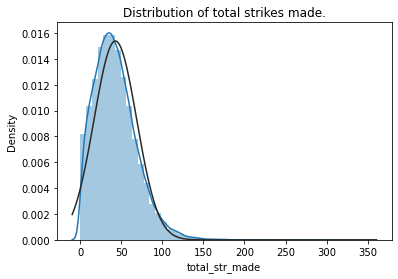

In [70]:
# we will choose the total strike made.
sns.distplot(df['total_str_made'], fit=stats.norm, kde=True)
plt.title('Distribution of total strikes made.')
plt.show()
#graph 1

In graph 1, we can see that this feature distribution is skewed to the right, as we can see since we plotted the normal distribution over, dark continuus line. In the graph we also realize that the outliners seem to be up to the 100 strikes made, now we will use boxplot, that is a plot function that "switches" the view of the histogram, to have another look to the outliners.

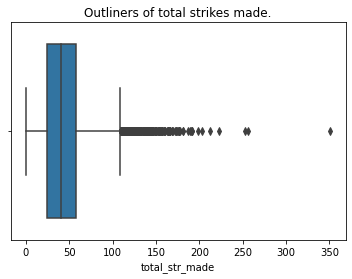

In [71]:
sns.boxplot(df['total_str_made'])
plt.title('Outliners of total strikes made.')
plt.show()
#graph 2

As we have seen in the distribution plot, the outliners (diamonds) in the graph 2 are the values greater than 100, are on the tail of the distribution.

Now, we need to treat this tail. There are few interesting ways to treat this tail, the most used is the Tukey's fences, which we will be using, since it takes into account the quantiles, for the lower limit and for the upper limit:
$$ \left[ Q1 - k*IQR, Q3 + k*IQR \right]$$

Where Q1 is the first quantile, Q3 is the 3rd quantile, $IQR = Q3 - Q1$, and k is a non-negative constant, which Tukey assigned the value $k=1.5$ for an outlier while $k=3$ it's assigned for a "far out".


Other methods are the Pierce criterion, the anomaly detection or the Modified Thompson Tau test.

https://en.wikipedia.org/wiki/Outlier

In [72]:
Q1 = df.total_str_made.quantile(0.25)
Q3 = df.total_str_made.quantile(0.75)
IQR = Q3 - Q1

In [73]:
# now lets get the upper limit and the lower limit. Actually, since out skew is on the right we don't need the lower
# limit
upper_lim = Q3 + 1.5*IQR
lower_lim = Q1 - 1.5*IQR
print('upper boundary:{} and lower boundary:{}'.format(upper_lim, lower_lim))

upper boundary:109.0 and lower boundary:-27.0


We can see that the lower boundary is outside the values of our data, thus there is no outliers on the left side. While the upper boundary falls into the range we assuming the tail would began: around 100.

Now let's remove the rows that are over the upper_lim.

In [74]:
indx = np.where(df.total_str_made >= upper_lim)
dfa = df.drop(indx[0]) # [0] does the array 1D! We don't write inplace because we don't want to overwrite the df!

In [75]:
dfa.shape

(29620, 26)

Let's drop the categorical features and do the normalization over the numerical ones.

In [76]:
dfx = dfa[['kd','sig_str_made', 'sig_str_attempted', 'sig_str_percent',
       'total_str_made', 'total_str_attempted', 'td_made', 'td_attempted',
       'td_percent', 'pass', 'rev', 'head_attempted', 'head_made',
       'body_attempted', 'body_made', 'leg_attempted', 'leg_made',
       'distance_attempted', 'distance_made', 'clinch_attempted',
       'clinch_made', 'ground_attempted']]

In [77]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(dfx)
df_scaled = pd.DataFrame(df_scaled, columns=['kd','sig_str_made', 'sig_str_attempted', 'sig_str_percent',
                                             'total_str_made', 'total_str_attempted', 'td_made', 'td_attempted',
                                             'td_percent', 'pass', 'rev', 'head_attempted', 'head_made',
                                             'body_attempted', 'body_made', 'leg_attempted', 'leg_made',
                                             'distance_attempted', 'distance_made', 'clinch_attempted',
                                             'clinch_made', 'ground_attempted'])

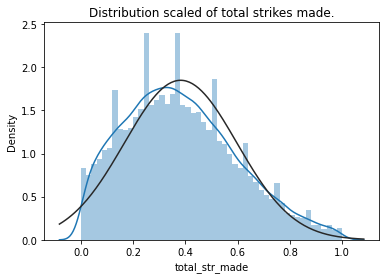

In [78]:
sns.distplot(df_scaled['total_str_made'], fit=stats.norm, kde=True)
plt.title('Distribution scaled of total strikes made.')
plt.show()
#graph 3

Graph 3 shows the scaled distribution of the total strikes made, if we fit a normal distribution to the data, we can see that more or less the distribution of the data vs the distribution of the normal are similar.

Since the data is now normalized we can proceed to do a PCA, ANOVA or Pearson's correlation analysis, its results will be more statistically significant than using raw data with outliers.

For completness we will get the skewness, mean and std.

In [79]:
m = df.total_str_made.mean()
sd = df.total_str_made.std()
sk = stats.skew(df.total_str_made, bias=False)

print('Non-Normalized data w outliers: Mean:{:.0f}, StandardDeviation:{:.0f}, Skewness: {:.0f}'
      .format(m,sd,sk)) # std is first decimal

m = df_scaled.total_str_made.mean()
sd = df_scaled.total_str_made.std()
sk = stats.skew(df_scaled.total_str_made, bias=False)

print('Normalized data w/t outliers: Mean:{:.1f}, StandardDeviation:{:.1f}, Skewness: {:.1f}'
      .format(m,sd,sk)) # std is first decimal

Non-Normalized data w outliers: Mean:43, StandardDeviation:26, Skewness: 1
Normalized data w/t outliers: Mean:0.4, StandardDeviation:0.2, Skewness: 0.4


The with the data normalized taking into account the outliers, we have reduced quantitevily the skewness of the dataset, from nearly 1 to 0.4.